In [2]:
# Install necessary libraries
!pip install pandas mlxtend matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# Step 2: Load Dataset
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving Groceries_dataset.csv to Groceries_dataset.csv


In [5]:
# Load the dataset into a DataFrame
data = pd.read_csv('Groceries_dataset.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# Data preprocessing
data['itemDescription'] = data['itemDescription'].str.strip()
data = data.dropna(subset=['itemDescription'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# Aggregate items per transaction
basket = (data
          .groupby(['Member_number', 'Date'])['itemDescription']
          .apply(lambda x: ','.join(x))
          .reset_index())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# One-hot encoding
basket_sets = basket['itemDescription'].str.get_dummies(sep=',')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Apply Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1400x800 with 0 Axes>

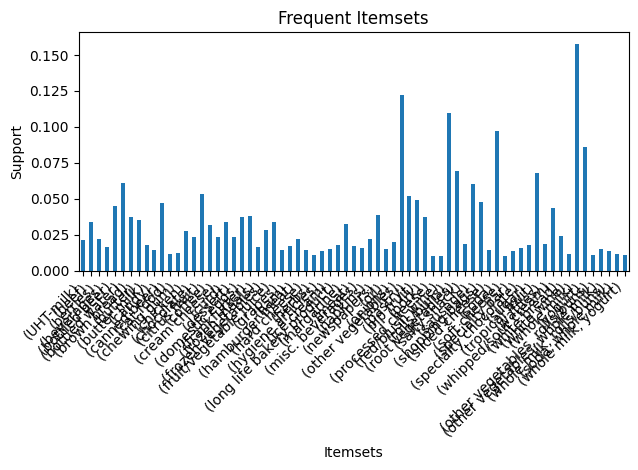

In [11]:
# Plot frequent itemsets with improved readability
plt.figure(figsize=(14, 8))  # Increase figure size
support_plot = frequent_itemsets.plot(kind='bar', x='itemsets', y='support', legend=False)

# Set plot title and labels
support_plot.set_title('Frequent Itemsets')
support_plot.set_xlabel('Itemsets')
support_plot.set_ylabel('Support')

# Rotate x-axis labels and adjust font size
support_plot.set_xticklabels(support_plot.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Adjust layout to make room for labels
plt.tight_layout()

# Show plot
plt.show()

In [35]:
print(frequent_itemsets.head())
print(frequent_itemsets.shape)

    support        itemsets
0  0.021386      (UHT-milk)
1  0.033950          (beef)
2  0.021787       (berries)
3  0.016574     (beverages)
4  0.045312  (bottled beer)
(69, 2)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
# Generate association rules with different min_threshold
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1)
print(rules.head())
print(rules.shape)

          antecedents         consequents  antecedent support  \
0  (other vegetables)        (rolls/buns)            0.122101   
1        (rolls/buns)  (other vegetables)            0.110005   
2  (other vegetables)        (whole milk)            0.122101   
3        (whole milk)  (other vegetables)            0.157923   
4        (whole milk)        (rolls/buns)            0.157923   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.110005  0.010559    0.086481  0.786154 -0.002872    0.974249   
1            0.122101  0.010559    0.095990  0.786154 -0.002872    0.971117   
2            0.157923  0.014837    0.121511  0.769430 -0.004446    0.958551   
3            0.122101  0.014837    0.093948  0.769430 -0.004446    0.968928   
4            0.110005  0.013968    0.088447  0.804028 -0.003404    0.976350   

   zhangs_metric  
0      -0.236553  
1      -0.234091  
2      -0.254477  
3      -0.262461  
4      -0.224474  
(10, 10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
#Inspecting rules data frame
print(rules.columns)

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction', 'zhangs_metric'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


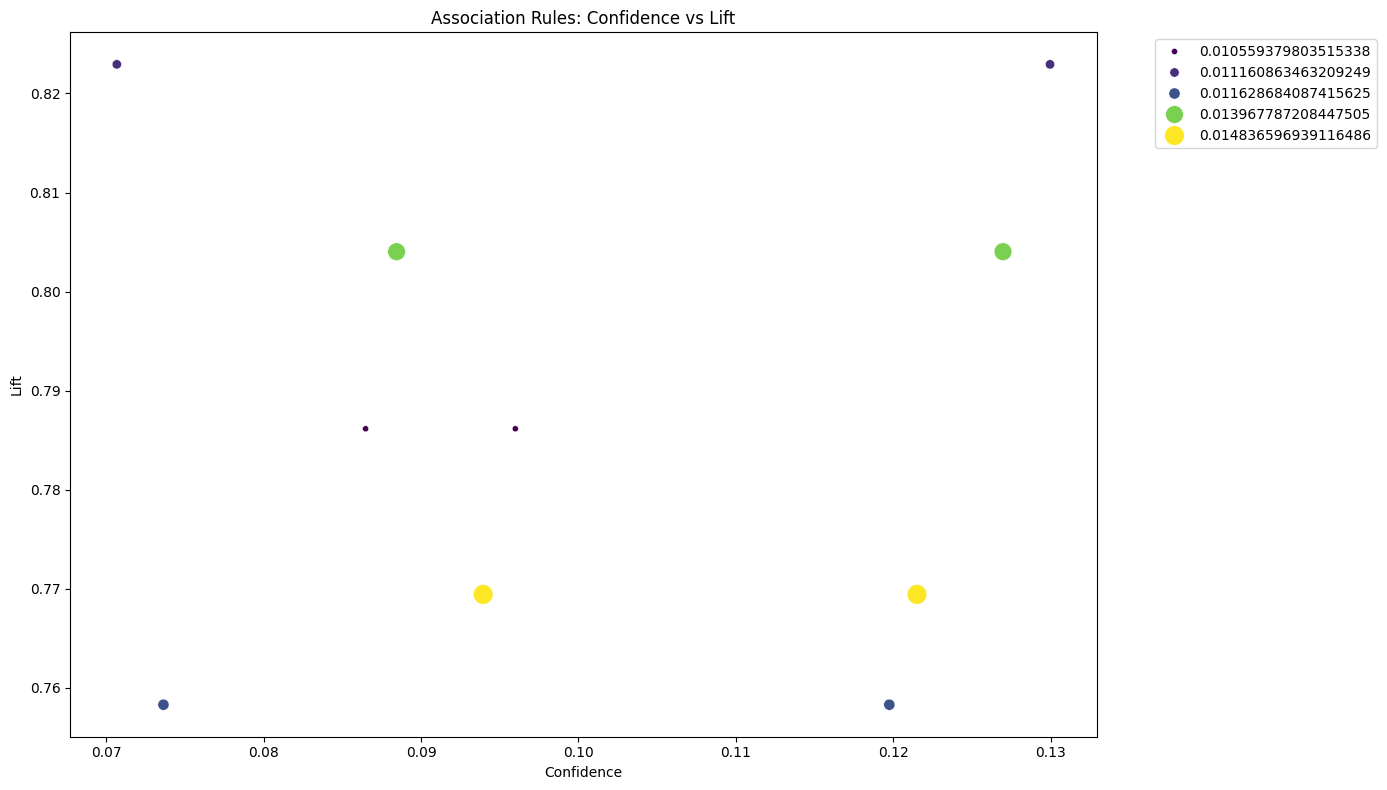

In [38]:
# Optional: Plot rules if they exist
if not rules.empty:
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(14, 8))
    sns.scatterplot(data=rules, x='confidence', y='lift', hue='support', size='support', palette='viridis', sizes=(20, 200))
    plt.title('Association Rules: Confidence vs Lift')
    plt.xlabel('Confidence')
    plt.ylabel('Lift')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("No rules available for plotting.")

In [41]:
print("Market Basket Analysis project using the Apriori algorithm is done")

Market Basket Analysis project using the Apriori algorithm is done


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
